# Sports Anaytics Group Project
By: Daniel Leal, Hannah Santa Maria, Nathalie Quiroz and Jiatai Xie


In [47]:
# download packages needed
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
plt.style.use('fivethirtyeight')

In [48]:
# read csv file
nba_20162020 = pd.read_csv("https://raw.githubusercontent.com/nquiroz2/sportsanalyticsgroupproject/main/NBA_2016-21_pergame.csv")
nba_20162020


,TEAM,Season,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,+/-
0,Utah Jazz,2020-2021,42,31,11,0.738,48.1,116.8,41.2,88.0,...,36.9,47.8,23.7,14.3,6.5,5.5,4.1,18.9,19.8,8.3
1,Philadelphia 76ers,2020-2021,44,31,13,0.705,48.6,115.0,42.0,87.7,...,36.3,46.6,23.5,15.4,8.8,6.3,4.5,20.3,21.2,5.5
2,Phoenix Suns,2020-2021,42,29,13,0.690,48.5,114.0,42.9,87.5,...,35.1,43.3,27.4,13.3,6.6,4.3,3.8,19.8,17.9,6.7
3,Brooklyn Nets,2020-2021,44,30,14,0.682,48.6,120.1,43.7,87.4,...,35.2,43.9,26.7,14.0,6.6,5.3,4.4,19.0,18.8,5.0
4,Milwaukee Bucks,2020-2021,42,28,14,0.667,48.1,120.0,44.6,91.6,...,38.3,48.6,26.2,13.9,8.0,4.8,4.7,17.6,18.5,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Orlando Magic,2016-2017,82,29,53,0.354,48.3,101.1,38.3,87.0,...,33.3,43.2,22.2,13.3,7.1,4.8,5.1,19.3,18.7,-6.6
146,Philadelphia 76ers,2016-2017,82,28,54,0.341,48.4,102.4,37.7,85.3,...,33.0,42.8,23.8,16.7,8.4,5.1,5.4,21.9,19.6,-5.7
147,Los Angeles Lakers,2016-2017,82,26,56,0.317,48.1,104.6,39.3,87.4,...,32.1,43.5,20.9,15.2,8.2,3.9,5.4,20.7,18.5,-6.9
148,Phoenix Suns,2016-2017,82,24,58,0.293,48.4,107.7,39.9,88.5,...,33.1,45.0,19.6,15.4,8.2,4.9,5.3,24.8,22.2,-5.6


In [49]:
# pandas melt function
melt_df = pd.melt(nba_20162020, id_vars='TEAM')
# view melt_df
#melt_df
# check melt_df counts
melt_df['TEAM'].value_counts()

Washington Wizards        135
Minnesota Timberwolves    135
Indiana Pacers            135
Houston Rockets           135
Denver Nuggets            135
Miami Heat                135
Golden State Warriors     135
Memphis Grizzlies         135
Dallas Mavericks          135
Phoenix Suns              135
Philadelphia 76ers        135
Orlando Magic             135
Oklahoma City Thunder     135
Toronto Raptors           135
New York Knicks           135
Atlanta Hawks             135
Charlotte Hornets         135
Portland Trail Blazers    135
Utah Jazz                 135
Brooklyn Nets             135
Boston Celtics            135
Sacramento Kings          135
Milwaukee Bucks           135
Cleveland Cavaliers       135
New Orleans Pelicans      135
Chicago Bulls             135
LA Clippers               135
Los Angeles Lakers        135
Detroit Pistons           135
San Antonio Spurs         135
Name: TEAM, dtype: int64

In [50]:
nba_20162020['3PtoFG%'] = 100*nba_20162020['3PA']/nba_20162020['FGA']

print(nba_20162020.describe().round(3))

            GP        W        L     WIN%      MIN      PTS      FGM      FGA  \
count  150.000  150.000  150.000  150.000  150.000  150.000  150.000  150.000   
mean    71.853   35.927   35.927    0.499   48.314  109.351   40.327   87.564   
std     15.376   13.200   12.816    0.142    0.172    4.853    1.725    2.457   
min     40.000   10.000   11.000    0.207   48.000   97.900   36.200   79.500   
25%     68.000   24.000   27.000    0.391   48.200  105.375   39.025   85.925   
50%     82.000   35.000   34.000    0.500   48.300  109.650   40.300   87.650   
75%     82.000   47.750   45.000    0.610   48.400  113.300   41.575   89.175   
max     82.000   67.000   65.000    0.817   48.700  120.100   44.600   94.000   

           FG%      3PM  ...      REB      AST      TOV      STL      BLK  \
count  150.000  150.000  ...  150.000  150.000  150.000  150.000  150.000   
mean    46.059   11.292  ...   44.257   23.907   14.179    7.647    4.853   
std      1.455    1.915  ...    1.993  

In [53]:
#calculate average 3PA for each season 
Avg3PA_PerSeason = nba_20162020.groupby('Season')['3PA'].mean().round(3)
print('Avg3PA_PerSeason',Avg3PA_PerSeason)
Avg3PM_PerSeason = nba_20162020.groupby('Season')['3PM'].mean().round(3)
print('Avg3PM_PerSeason',Avg3PM_PerSeason)
Avg3PPercent_PerSeason = nba_20162020.groupby('Season')['3P%'].mean().round(3)
print('Avg3PPercent_PerSeason',Avg3PPercent_PerSeason)
Avg3PtoFG_PerSeason = nba_20162020.groupby('Season')['3PtoFG%'].mean().round(3)
print('Avg3PtoFG',Avg3PtoFG_PerSeason)

Avg3PA_PerSeason Season
2016-2017    27.003
2017-2018    28.997
2018-2019    32.007
2019-2020    34.103
2020-2021    34.763
Name: 3PA, dtype: float64
Avg3PM_PerSeason Season
2016-2017     9.650
2017-2018    10.487
2018-2019    11.360
2019-2020    12.193
2020-2021    12.770
Name: 3PM, dtype: float64
Avg3PPercent_PerSeason Season
2016-2017    35.717
2017-2018    36.173
2018-2019    35.550
2019-2020    35.777
2020-2021    36.673
Name: 3P%, dtype: float64
Avg3PtoFG Season
2016-2017    31.627
2017-2018    33.704
2018-2019    35.881
2019-2020    38.392
2020-2021    39.368
Name: 3PtoFG%, dtype: float64


Text(0.5, 0, 'Season')

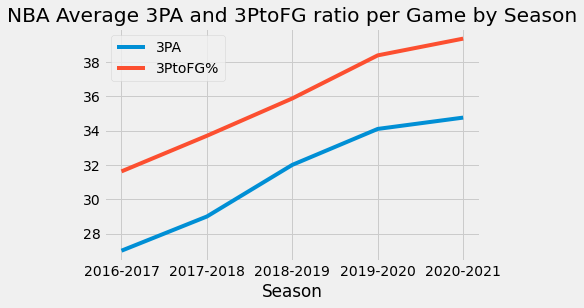

In [57]:
# Plot NBA Average 3PA per Game by Season
ax = (Avg3PA_PerSeason.plot(title='NBA Average 3PA and 3PtoFG ratio per Game by Season'))
Avg3PtoFG_PerSeason.plot()
ax.legend()
ax.set_xlabel('Season')
#plt.xticks(rotation = 45)


In [58]:
# use query() method to filter Seasons
nba_20202021 = nba_20162020.query("Season=='2020-2021'")
nba_20192020 = nba_20162020.query("Season=='2019-2020'")
nba_20182019 = nba_20162020.query("Season=='2018-2019'")
nba_20172018 = nba_20162020.query("Season=='2017-2018'")
nba_20162017 = nba_20162020.query("Season=='2016-2017'")

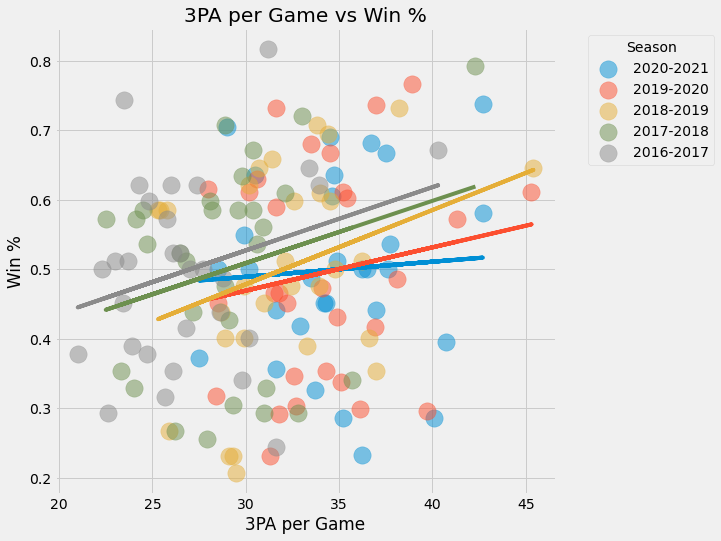

In [101]:
# multiple line plots
slopes_3PM=[]

plt.figure(figsize=(8,8))
plt.scatter( '3PA', 'WIN%', data=nba_20202021, label="2020-2021",s=300,alpha=0.5)
m, b = np.polyfit(nba_20202021['3PA'],nba_20202021['WIN%'] , 1)
slopes_3PM+=[m]
plt.plot(nba_20202021['3PA'], m*nba_20202021['3PA'] + b)

plt.scatter( '3PA', 'WIN%', data=nba_20192020, label="2019-2020",s=300,alpha=0.5)
m, b = np.polyfit(nba_20192020['3PA'],nba_20192020['WIN%'] , 1)
slopes_3PM+=[m]
plt.plot(nba_20192020['3PA'], m*nba_20192020['3PA'] + b)

plt.scatter( '3PA', 'WIN%', data=nba_20182019, label="2018-2019",s=300,alpha=0.5)
m, b = np.polyfit(nba_20182019['3PA'],nba_20182019['WIN%'] , 1)
slopes_3PM+=[m]
plt.plot(nba_20182019['3PA'], m*nba_20182019['3PA'] + b)

plt.scatter( '3PA', 'WIN%', data=nba_20172018, label="2017-2018",s=300,alpha=0.5)
m, b = np.polyfit(nba_20172018['3PA'],nba_20172018['WIN%'] , 1)
slopes_3PM+=[m]
plt.plot(nba_20172018['3PA'], m*nba_20172018['3PA'] + b)

plt.scatter( '3PA', 'WIN%', data=nba_20162017, label="2016-2017",s=300,alpha=0.5)
m, b = np.polyfit(nba_20162017['3PA'],nba_20162017['WIN%'] , 1)
slopes_3PM+=[m]
plt.plot(nba_20162017['3PA'], m*nba_20162017['3PA'] + b)
# show legend
#plt.legend()
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add title and axis names
plt.title('3PA per Game vs Win %')
plt.xlabel('3PA per Game')
plt.ylabel('Win %')
# show graph
plt.show()

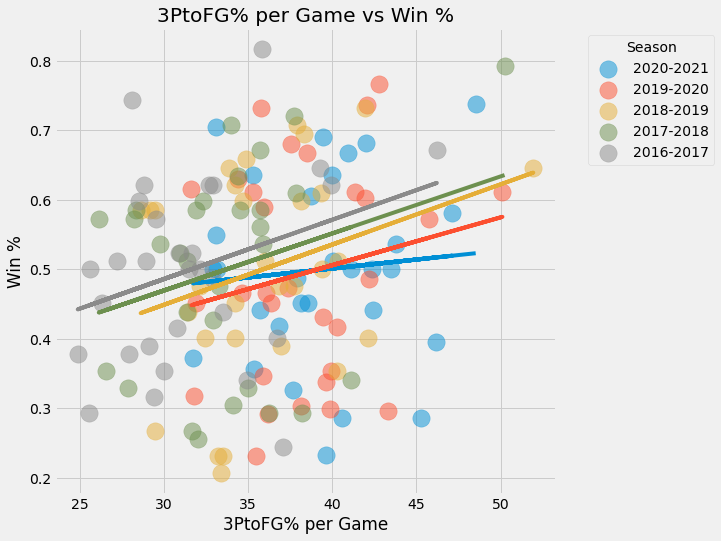

In [102]:
slopes_3PtoFG=[]

plt.figure(figsize=(8,8))
plt.scatter( '3PtoFG%', 'WIN%', data=nba_20202021, label="2020-2021",s=300,alpha=0.5)
m, b = np.polyfit(nba_20202021['3PtoFG%'],nba_20202021['WIN%'] , 1)
slopes_3PtoFG+=[m]
plt.plot(nba_20202021['3PtoFG%'], m*nba_20202021['3PtoFG%'] + b)

plt.scatter( '3PtoFG%', 'WIN%', data=nba_20192020, label="2019-2020",s=300,alpha=0.5)
m, b = np.polyfit(nba_20192020['3PtoFG%'],nba_20192020['WIN%'] , 1)
slopes_3PtoFG+=[m]
plt.plot(nba_20192020['3PtoFG%'], m*nba_20192020['3PtoFG%'] + b)

plt.scatter( '3PtoFG%', 'WIN%', data=nba_20182019, label="2018-2019",s=300,alpha=0.5)
m, b = np.polyfit(nba_20182019['3PtoFG%'],nba_20182019['WIN%'] , 1)
slopes_3PtoFG+=[m]
plt.plot(nba_20182019['3PtoFG%'], m*nba_20182019['3PtoFG%'] + b)

plt.scatter( '3PtoFG%', 'WIN%', data=nba_20172018, label="2017-2018",s=300,alpha=0.5)
m, b = np.polyfit(nba_20172018['3PtoFG%'],nba_20172018['WIN%'] , 1)
slopes_3PtoFG+=[m]
plt.plot(nba_20172018['3PtoFG%'], m*nba_20172018['3PtoFG%'] + b)

plt.scatter( '3PtoFG%', 'WIN%', data=nba_20162017, label="2016-2017",s=300,alpha=0.5)
m, b = np.polyfit(nba_20162017['3PtoFG%'],nba_20162017['WIN%'] , 1)
slopes_3PtoFG+=[m]
plt.plot(nba_20162017['3PtoFG%'], m*nba_20162017['3PtoFG%'] + b)

# show legend
#plt.legend()
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add title and axis names
plt.title('3PtoFG% per Game vs Win %')
plt.xlabel('3PtoFG% per Game')
plt.ylabel('Win %')
# show graph
plt.show()



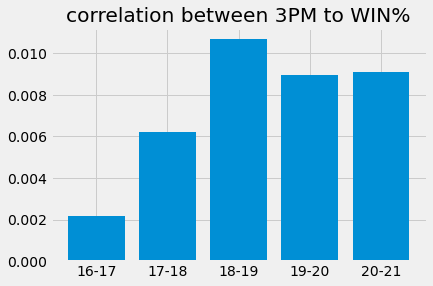

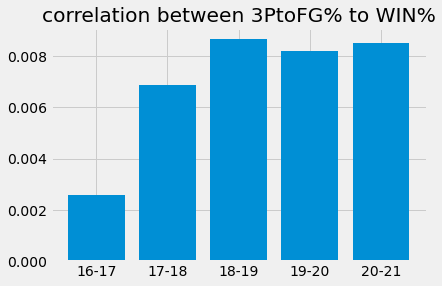

In [116]:
slopes_3PM=slopes_3PM[::-1]
plt.bar(['16-17','17-18','18-19','19-20','20-21'],slopes_3PM)
plt.title('correlation between 3PM to WIN%')
plt.show()
slopes_3PtoFG=slopes_3PtoFG[::-1]
plt.bar(['16-17','17-18','18-19','19-20','20-21'],slopes_3PtoFG)
plt.title('correlation between 3PtoFG% to WIN%')
plt.show()

